In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from sentence_transformers import SentenceTransformer, InputExample, losses, evaluation, models,util

In [59]:
data = pd.read_csv("cluster_article_tensor.csv")
model = SentenceTransformer("fine_tuned_model_256")

In [63]:
a1 = model.encode("this is a very good model")
a2 = model.encode("we have made a model that has nice performance")

In [64]:
np.linalg.norm(np.array(a1) - np.array(a2))

2.6342175

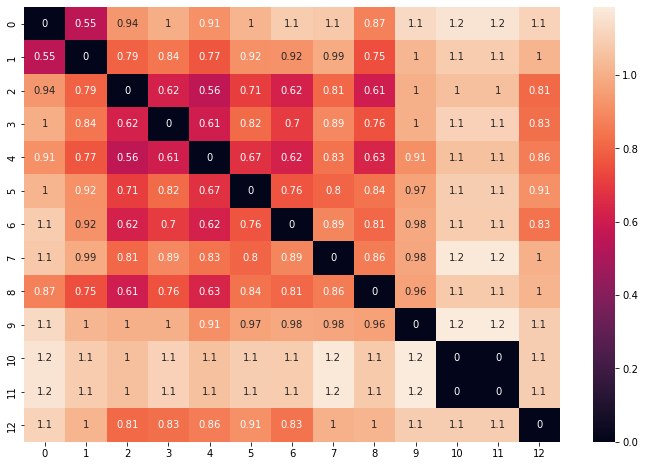

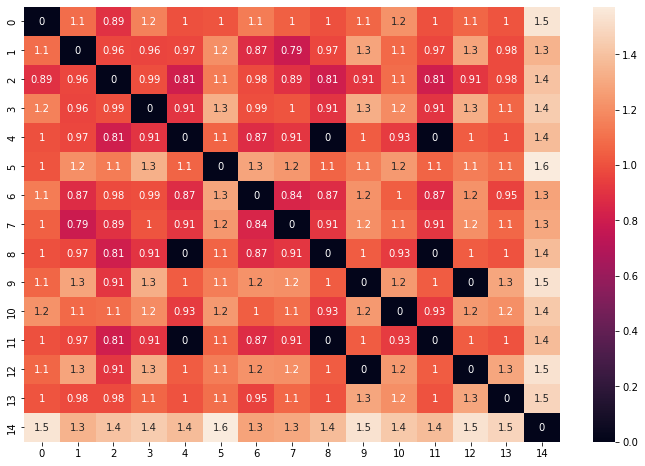

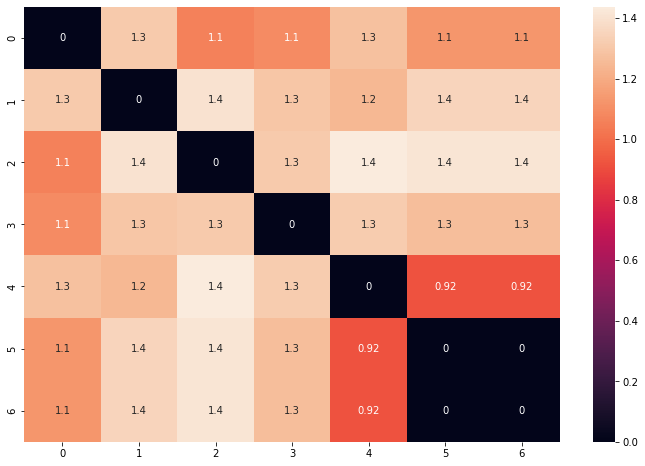

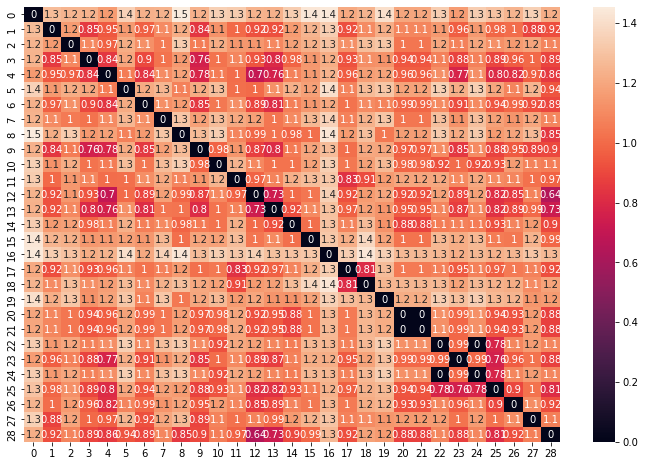

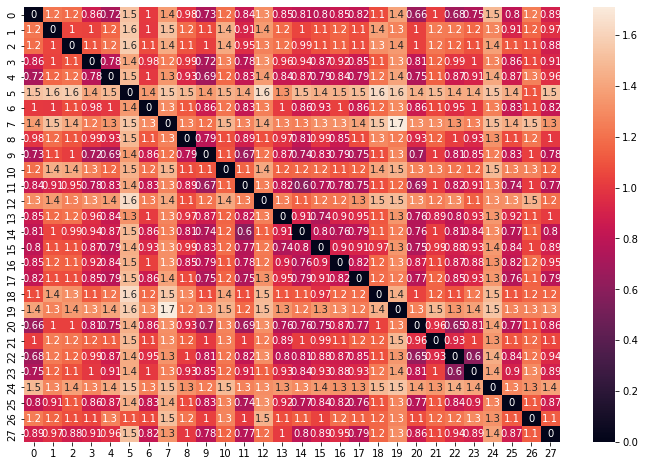

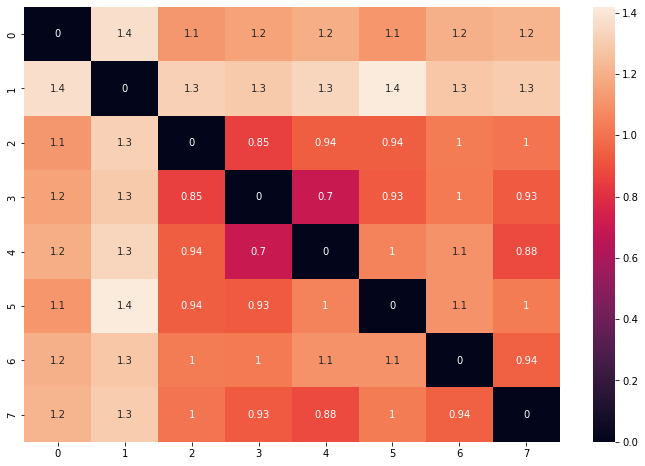

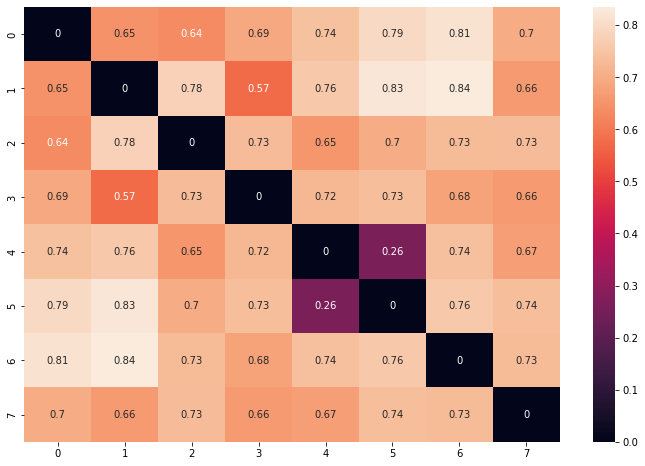

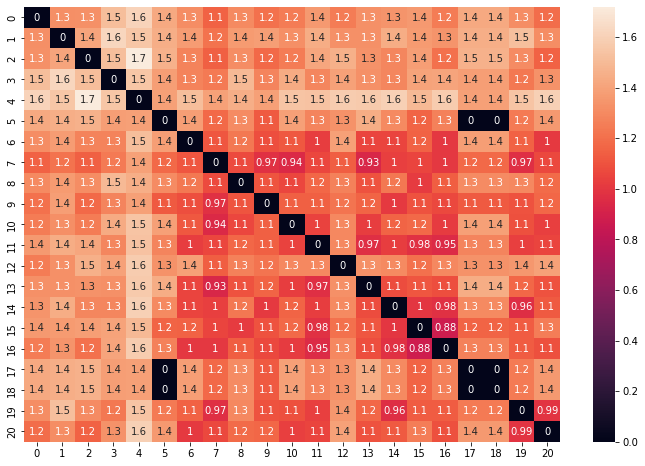

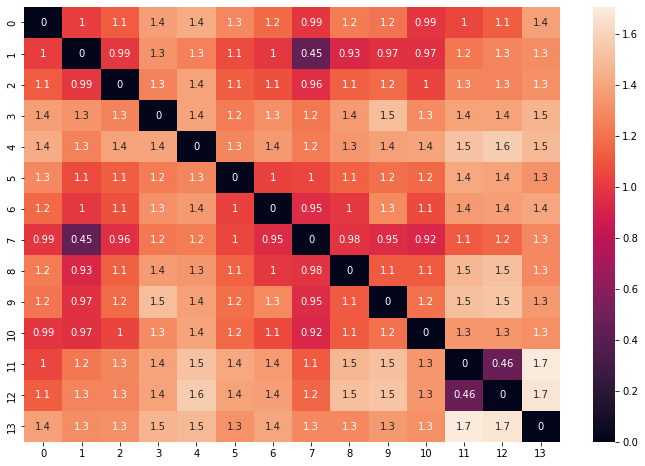

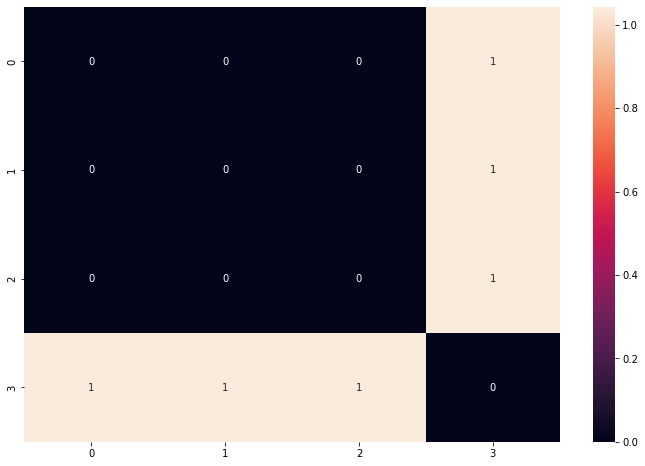

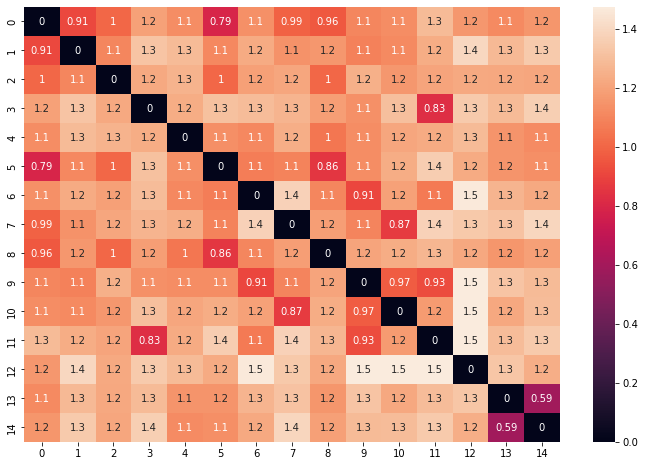

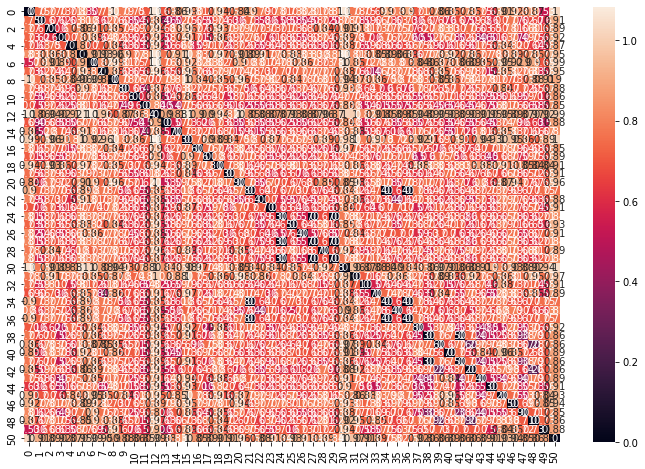

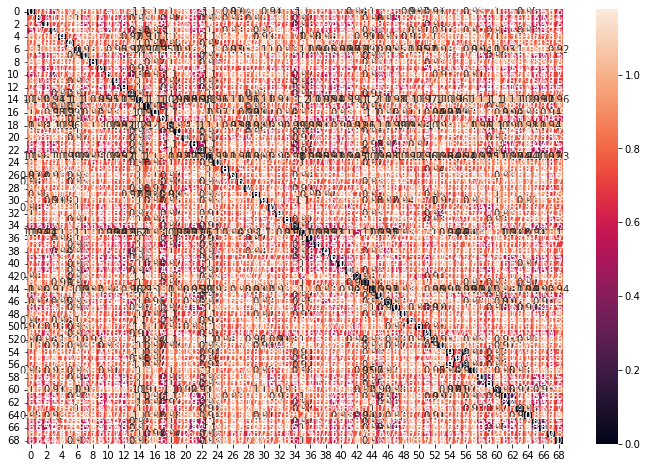

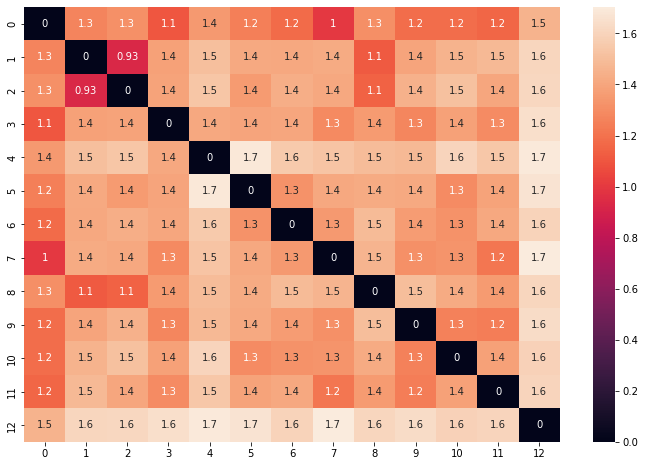

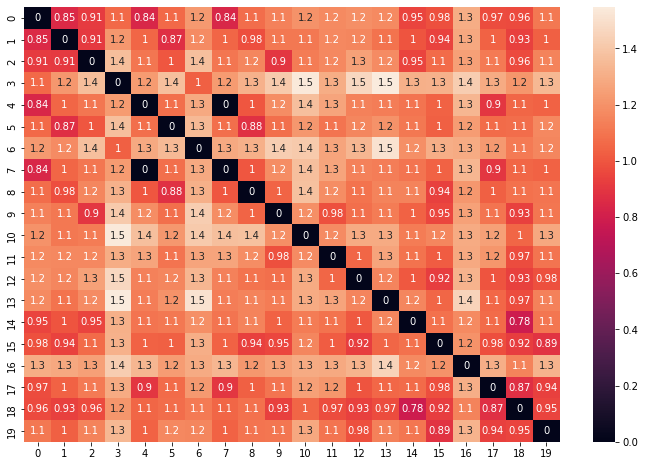

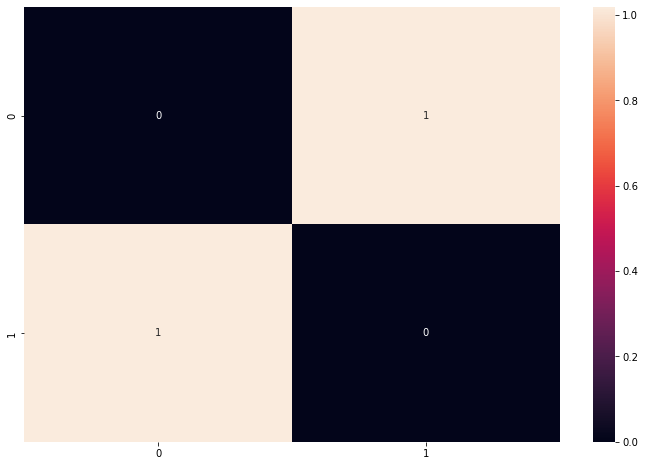

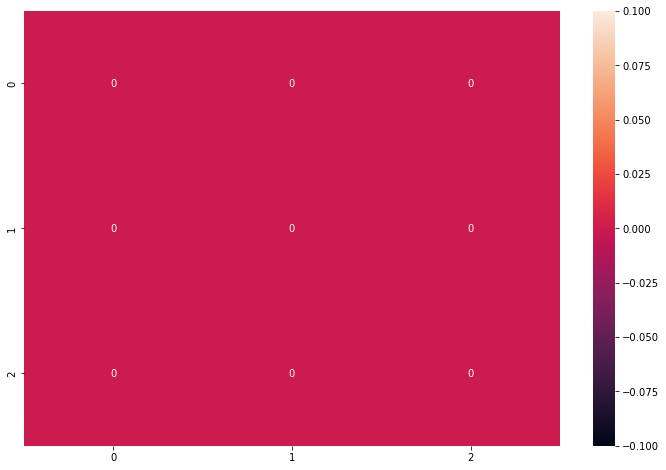

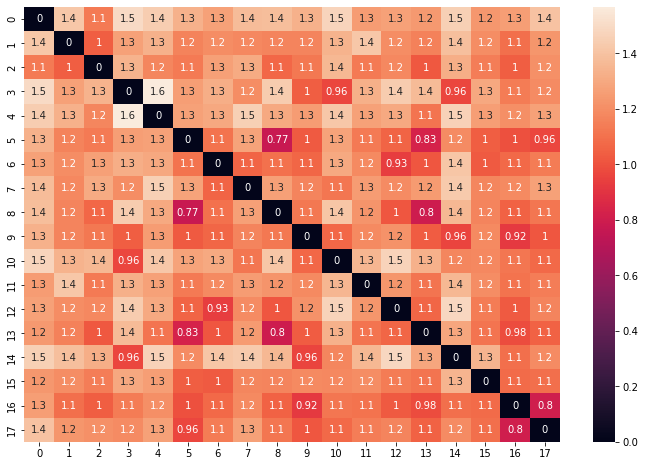

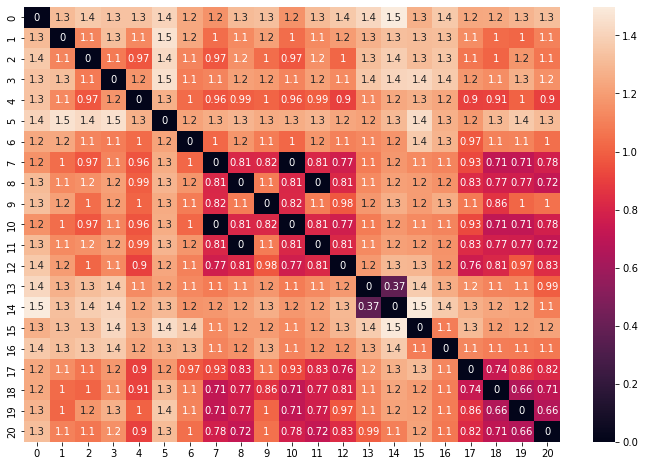

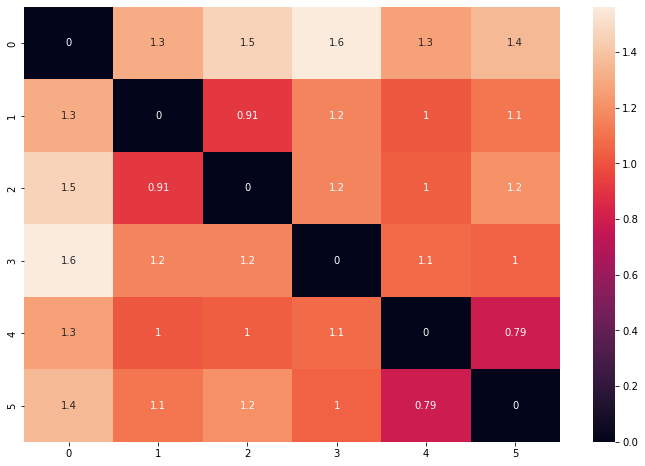

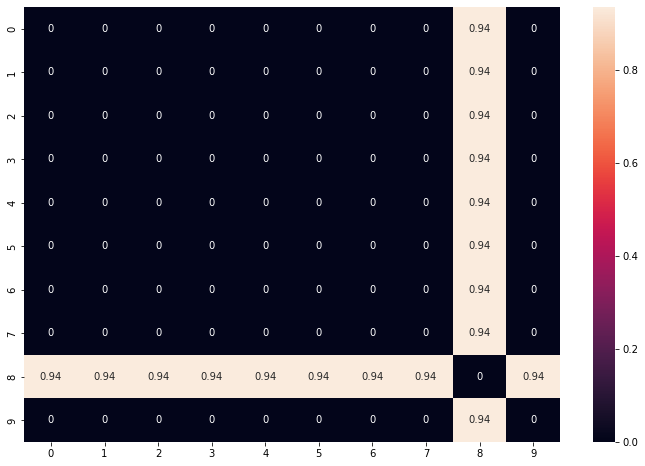

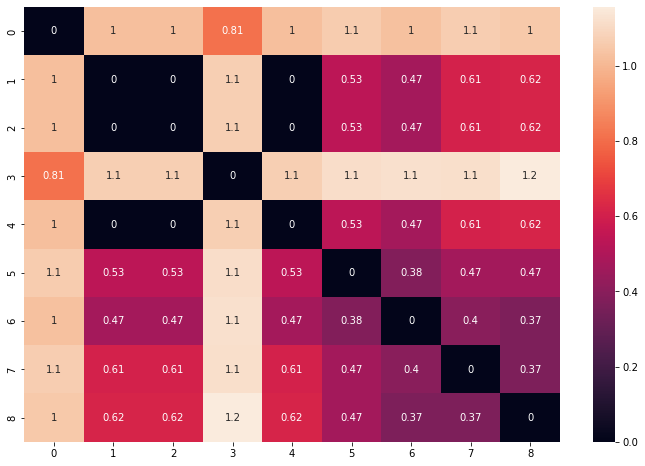

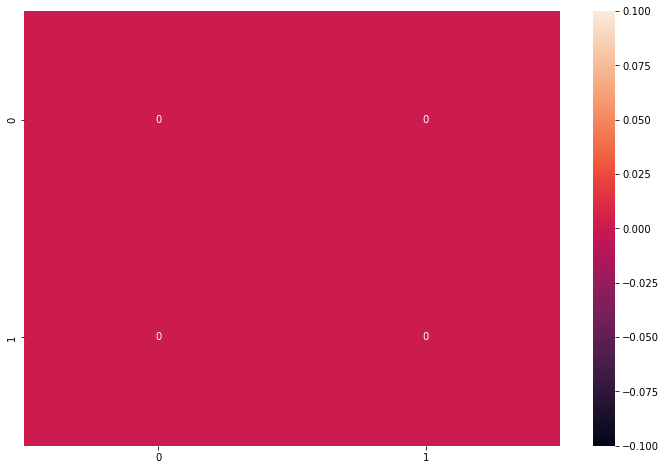

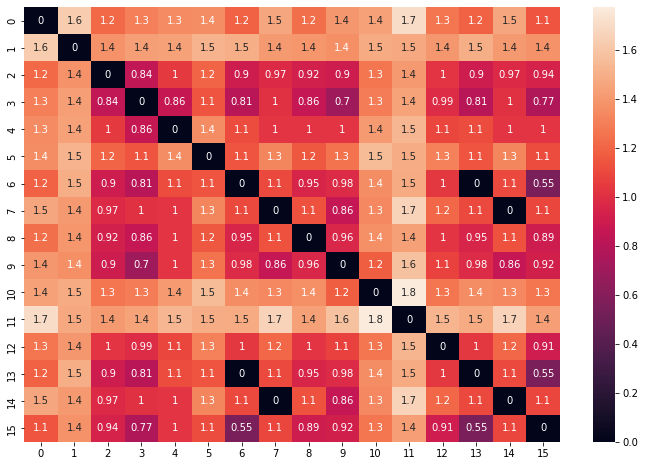

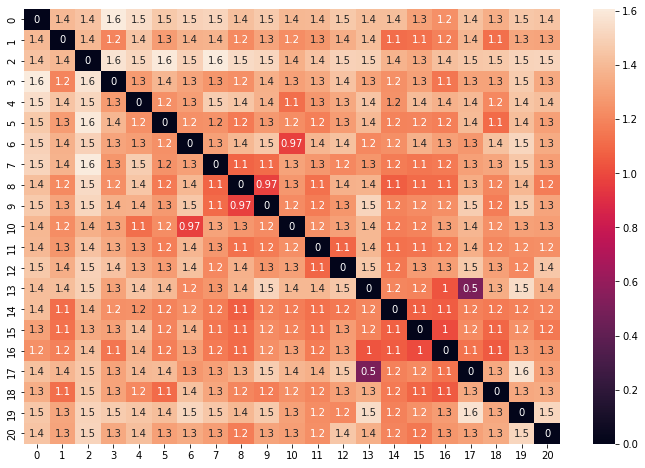

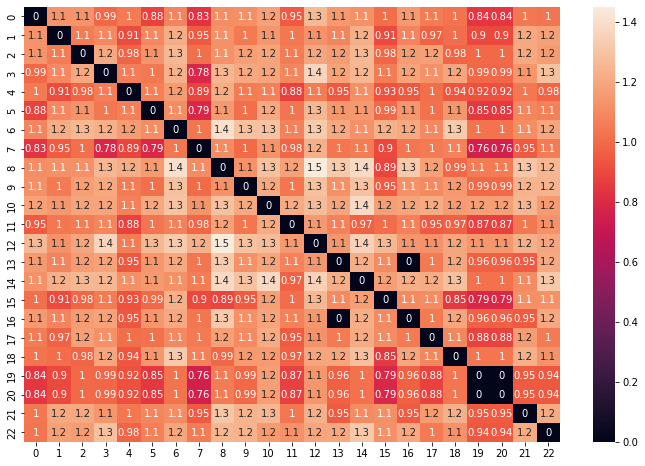

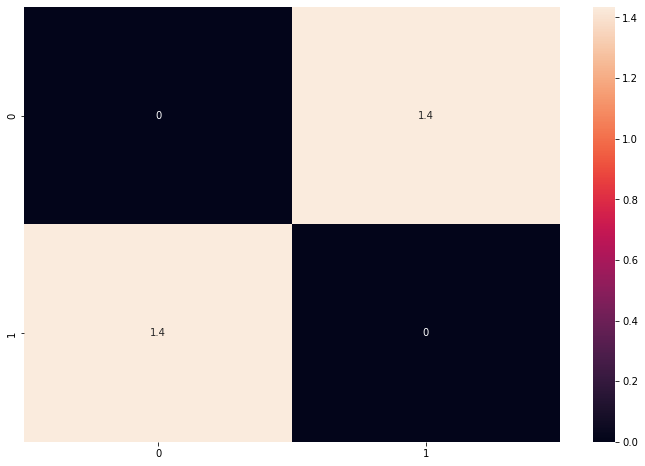

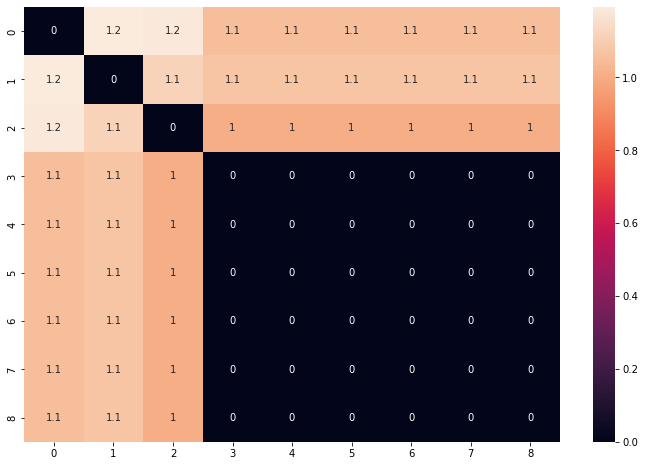

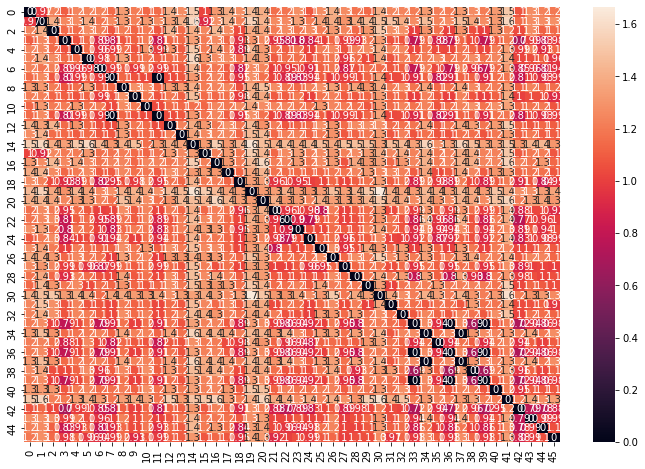

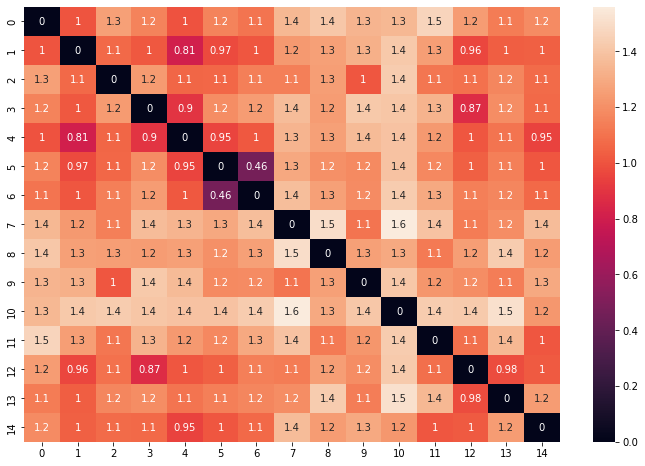

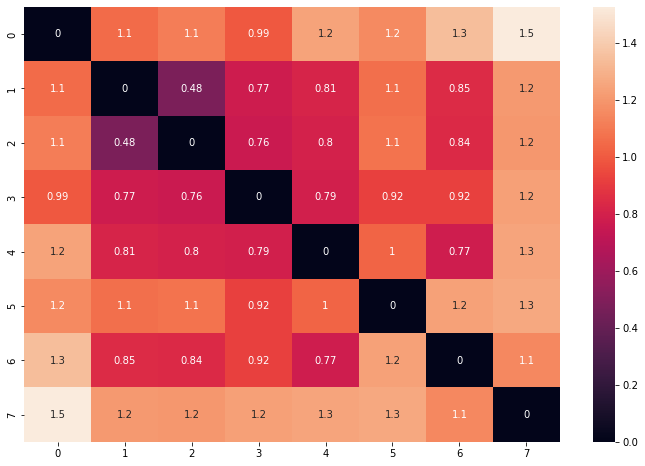

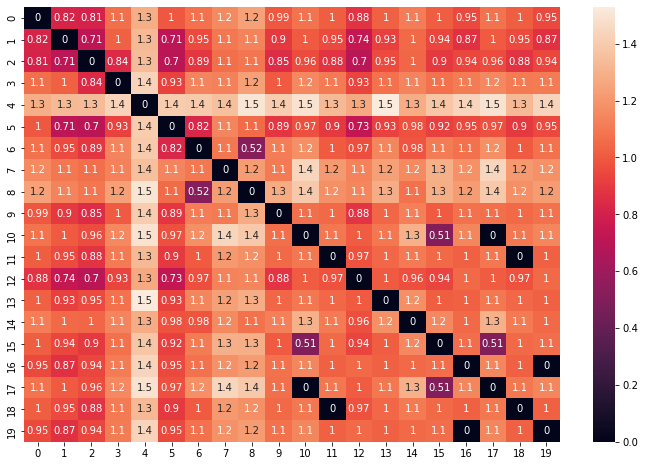

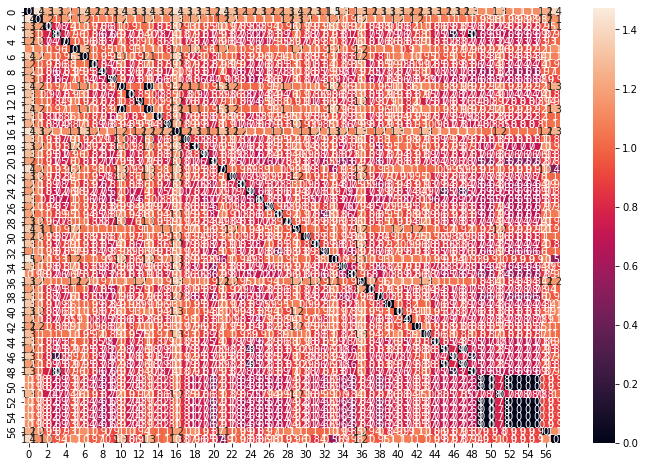

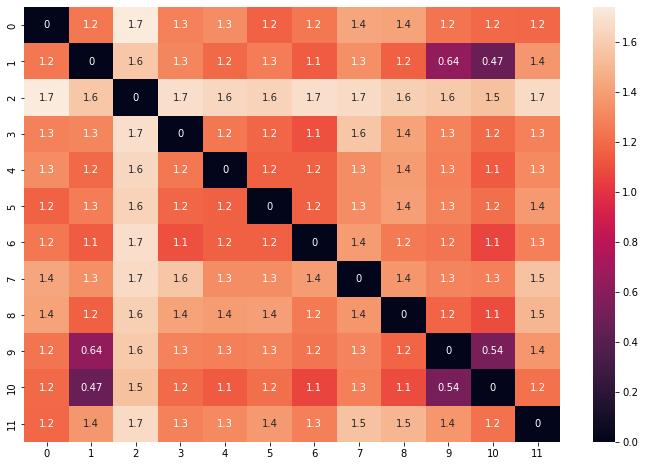

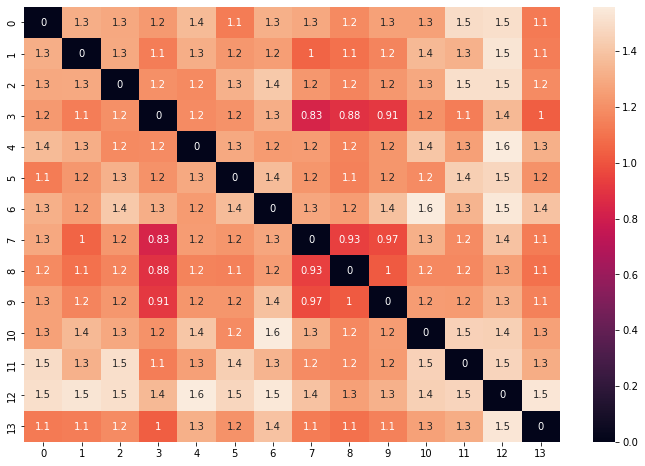

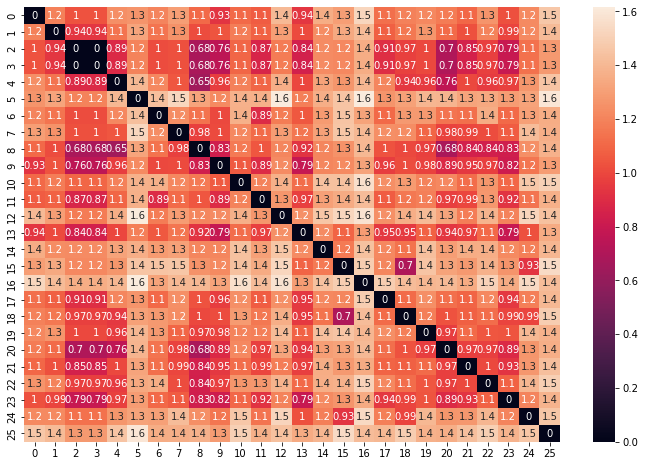

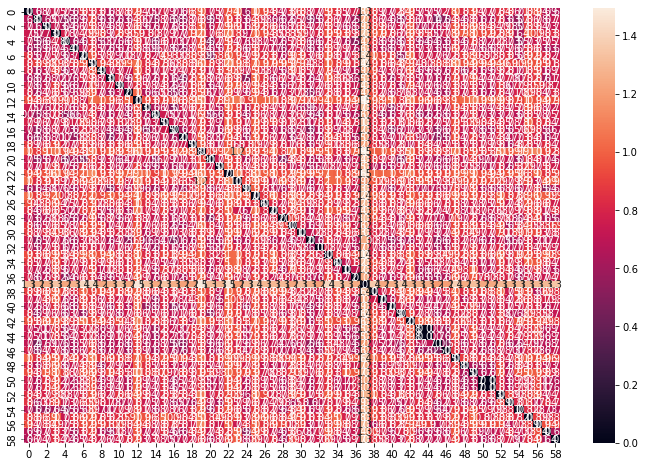

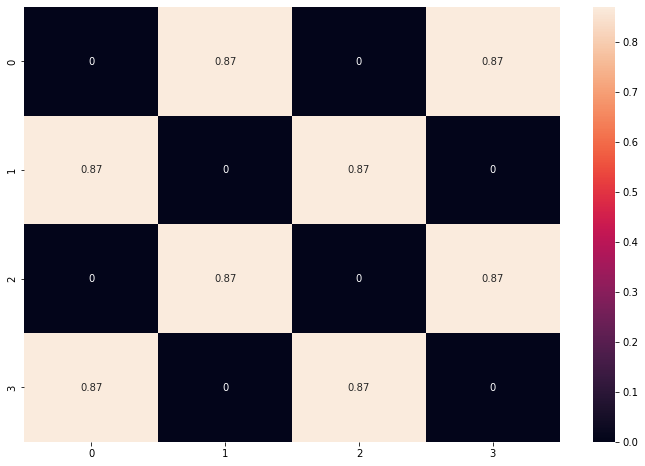

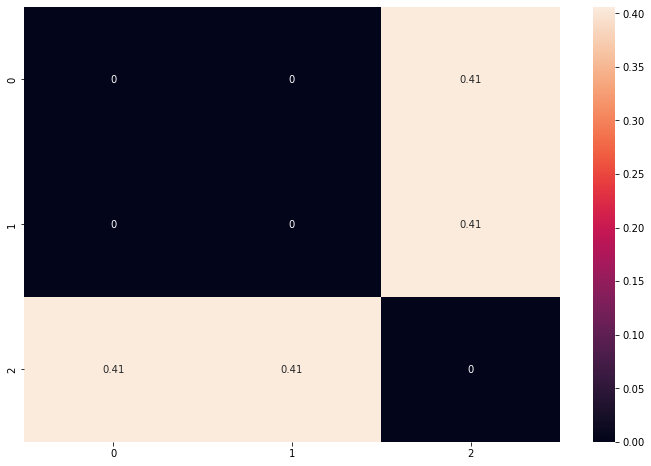

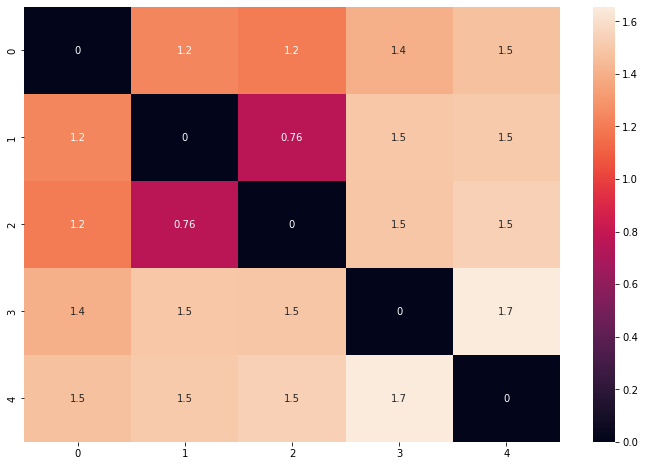

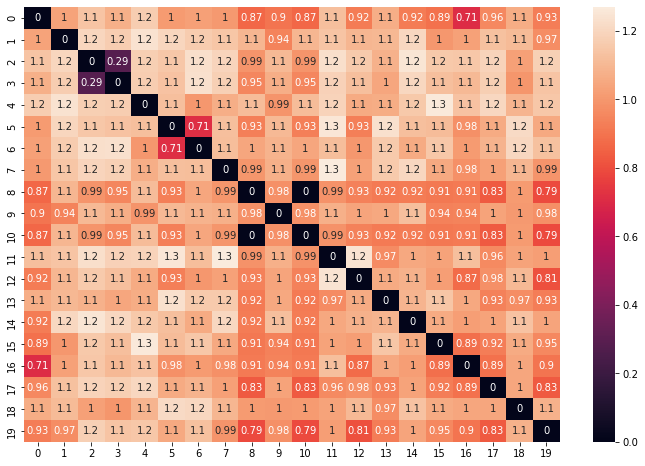

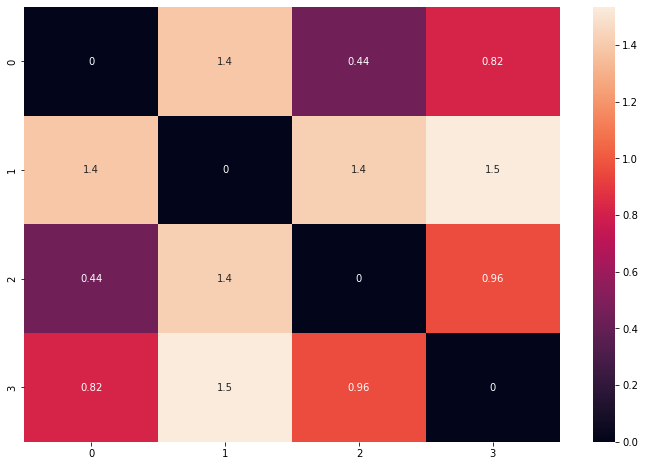

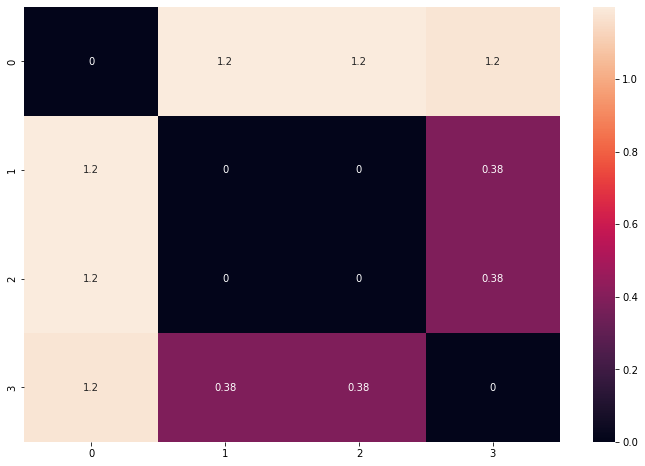

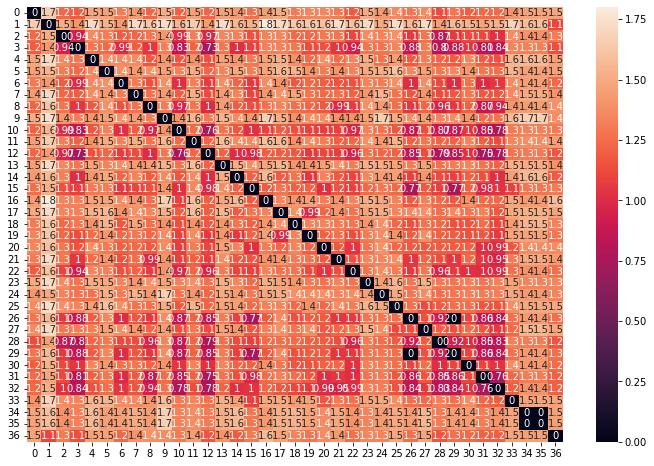

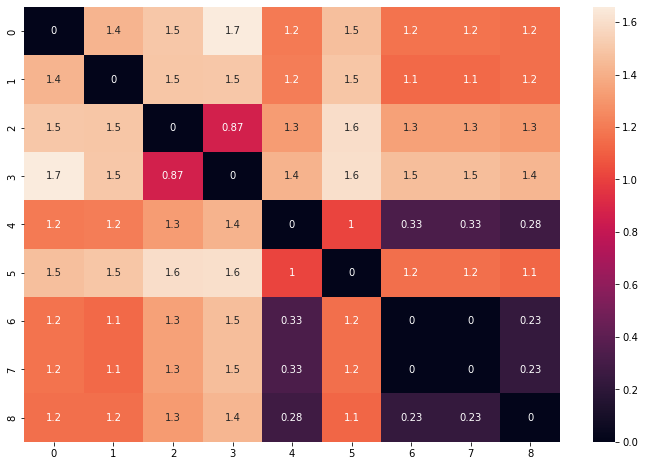

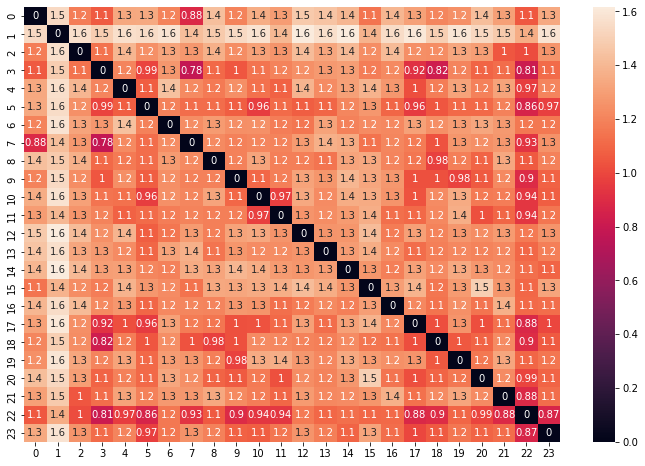

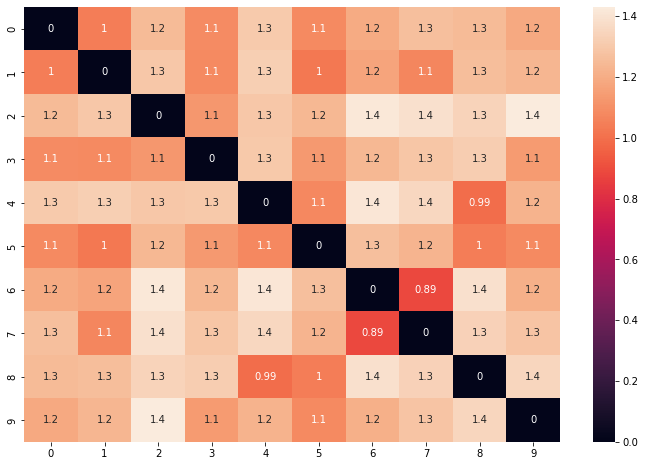

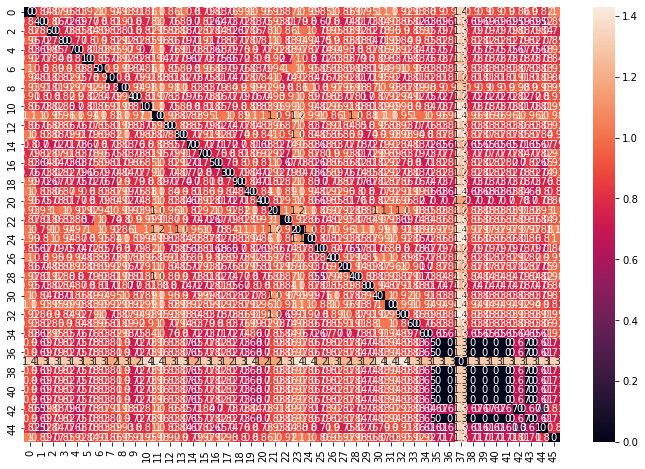

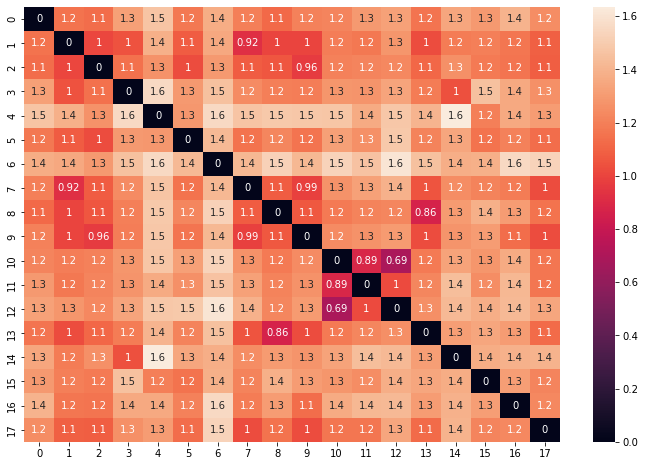

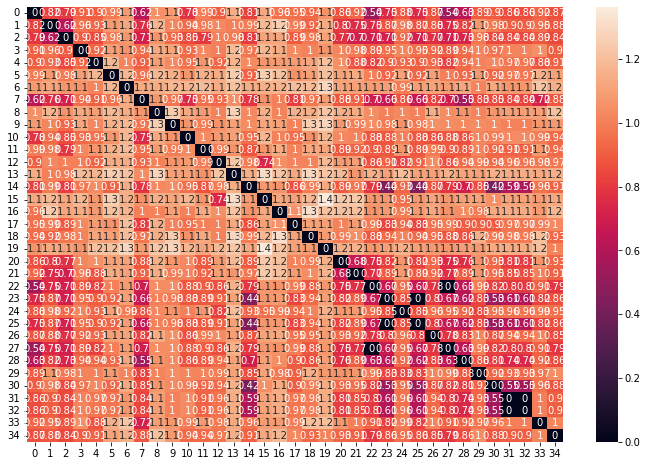

In [65]:
for i in range(50):
    cluster = data[data["cluster"]==i]
    cluster = cluster.drop(["Unnamed: 0", "cluster", "article"],axis=1)
    tensors = []
    for i in range(cluster.shape[0]):
        tensor = [tensor for tensor in cluster.iloc[i,:]]
        tensors.append(tensor)
    length = len(tensors)
    distances = np.zeros([length, length])
    for i in range(length):
        for j in range(length):
            t1 = np.array(tensors[i])
            t2 = np.array(tensors[j])
            distances[i][j] = np.linalg.norm(np.array(tensors[i]) - np.array(tensors[j]))/2.6
    plt.figure(figsize=(12,8))
    sns.heatmap(distances,annot=True)
    plt.show()

In [11]:
a = np.array([1,1.3,1.4])

In [13]:
np.linalg.norm(a-a)

0.0